# 2018 미국&캐나다 여행 지출내역 분석
+ Pandas의 pivot, group_by, pivot_table 함수를 연습해보자
+ 참조사이트 : https://datascienceschool.net/view-notebook/76dcd63bba2c4959af15bec41b197e7c/
_____

## 0. 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('finalcialdata.csv')
data.head()

,date,place,store,item,price,domain,meth,etc
0,2018-06-25,San Francisco,IN-N-OUT Burger,Set Menu 2,8.65,eat/drink,Card,NaN
1,2018-06-28,San Jose,Dish-n-Dash,Falafel,15.30,eat/drink,Cash,NaN
2,2018-07-01,Stanford,Tender Green,"Chicken, Lemonade",17.17,eat/drink,Card,NaN
3,2018-07-01,Stanford,Blue Bottle,Cold Brew,4.25,eat/drink,Card,NaN
4,2018-07-01,Stanford,CVS,vodka,24.18,eat/drink,Card,returned with cash


In [3]:
data.shape

(94, 8)

-----
## 1. 데이터 가공

### (1) pivot_table 함수사용
* pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, margins_name='All')

 + **data**         : 처리할 DataFrame
 + **values**       : Matrix에 어떤 값이 들어갈 것인가
 + **index**        : | 인덱스
 + **columns**      : ㅡ 인덱스
 + **aggfunc**      : 수행할 연산
 + **fill_value**   : NaN을 채울지 여부
 + **margins**      : 우측 및 하단에 values의 합계를 나타낼지 여부
 + **margins_name** : 마진의 이름

In [4]:
dateData = pd.pivot_table(data, values=["price"], index=["date"], aggfunc=np.sum)
methData = pd.pivot_table(data, values=["price"], index=["meth"], aggfunc=np.sum)

In [5]:
dateData.head()

,price
date,
2018-06-25,8.65
2018-06-28,15.30
2018-07-01,78.93
2018-07-07,76.15
2018-07-12,11.03


In [6]:
methData.head()

,price
meth,
Card,1122.33
Cash,279.43


_____

In [39]:
domainData = pd.pivot_table(data, "price", "domain", aggfunc=np.sum)
domainData.head()

,price
domain,
accommodation,289.55
eat/drink,474.02
etc,98.73
souvenir,176.38
transport,372.08


In [8]:
dateDomainData = pd.pivot_table(data, values=["price"], index=["date"], columns=["domain"], aggfunc=np.sum)
dateDomainData.head()

price                                 
domain     accommodation eat/drink etc souvenir transport
date                                                     
2018-06-25           NaN      8.65 NaN      NaN       NaN
2018-06-28           NaN     15.30 NaN      NaN       NaN
2018-07-01           NaN     50.59 NaN    28.34       NaN
2018-07-07           NaN     31.09 NaN    27.76      17.3
2018-07-12           NaN       NaN NaN    11.03       NaN

_____
### (2) groupby 함수사용
- 해당 feature에 대해 group화만 진행해준다. 이후 sum() 등의 연산이나 agg() 등의 사용자정의 함수를 실행시켜줘야 DataFrame이 반환된다!

### ① feature 한 개로 정렬

+ **groupby()** : "place"를 기준으로 그룹핑한다. groupby 함수는 data를 묶어만 주므로 대기상태인 DataFrameGroupBy 객체가 반환된다. 이후 연산을 수행하는 함수를 실행해줘야 DataFrame이 반환된다.

In [9]:
placeData = data.groupby(data.place)
placeData

+ **sum()** : DataFrameGroupBy 객체에 덧셈 연산을 적용해 DataFrame으로 반환한다. 이 때, 연산 가능한 column만 계산해 반환하므로 "price"만 등장하게 된다. mean(), max() 등 여러 함수를 사용할 수 있지만, 원하는 연산이 없을 때에는 agg()에 사용자정의함수를 넣어 사용한다.
  + https://pandas.pydata.org/pandas-docs/stable/api.html#groupby 참조

In [10]:
placeData = placeData.sum()
placeData

,price
place,
Portland,197.26
San Francisco,520.84
San Jose,315.73
Sausalito,33.50
Seattle,135.98
Stanford,73.94
Vancouver,133.51


In [11]:
# DataFrame으로 반환됨을 알 수 있다!
placeData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Portland to Vancouver
Data columns (total 1 columns):
price    7 non-null float64
dtypes: float64(1)
memory usage: 112.0+ bytes


-----
### ② feature 여러개로 정렬

+ **groupby()** : "date"와 "place"로 그룹핑 진행

In [12]:
datePlaceData = data.groupby(["date", "place"])
datePlaceData

+ **sum()** : DataFrame이 date와 place라는 Multi-index로 반환됨!

In [13]:
datePlaceData = datePlaceData.sum()
datePlaceData

price
date       place                
2018-06-25 San Francisco    8.65
2018-06-28 San Jose        15.30
2018-07-01 San Jose         4.99
           Stanford        73.94
2018-07-07 San Francisco   76.15
2018-07-12 San Jose        11.03
2018-07-15 San Jose        45.80
2018-07-18 San Jose        10.50
2018-07-19 San Jose       205.20
2018-07-20 San Jose        22.91
2018-07-21 San Francisco  152.55
2018-07-22 San Francisco  197.80
2018-07-23 San Francisco   57.63
           Sausalito       33.50
2018-07-24 Portland       125.66
           San Francisco   28.06
2018-07-25 Portland        68.15
2018-07-26 Portland         3.45
           Seattle         19.96
2018-07-27 Seattle        104.14
2018-07-28 Seattle         11.88
           Vancouver       30.43
2018-07-29 Vancouver      103.08

+ **unstack()** : Multi-index의 DataFrame일 경우 인자로 명시한 feature를 column으로 올려서 unstack 해줌.

In [14]:
datePlaceData.unstack("place")

price                                                    \
place      Portland San Francisco San Jose Sausalito Seattle Stanford   
date                                                                    
2018-06-25      NaN          8.65      NaN       NaN     NaN      NaN   
2018-06-28      NaN           NaN    15.30       NaN     NaN      NaN   
2018-07-01      NaN           NaN     4.99       NaN     NaN    73.94   
2018-07-07      NaN         76.15      NaN       NaN     NaN      NaN   
2018-07-12      NaN           NaN    11.03       NaN     NaN      NaN   
2018-07-15      NaN           NaN    45.80       NaN     NaN      NaN   
2018-07-18      NaN           NaN    10.50       NaN     NaN      NaN   
2018-07-19      NaN           NaN   205.20       NaN     NaN      NaN   
2018-07-20      NaN           NaN    22.91       NaN     NaN      NaN   
2018-07-21      NaN        152.55      NaN       NaN     NaN      NaN   
2018-07-22      NaN        197.80      NaN       NaN     NaN      NaN   
2018-07-23      NaN         57.63      NaN      33.5     NaN      NaN   
2018-07-24   125.66         28.06      NaN       NaN     NaN      NaN   
2018-07-25    68.15           NaN      NaN       NaN     NaN      NaN   
2018-07-26     3.45           NaN      NaN       NaN   19.96      NaN   
2018-07-27      NaN           NaN      NaN       NaN  104.14      NaN   
2018-07-28      NaN           NaN      NaN       NaN   11.88      NaN   
2018-07-29      NaN           NaN      NaN       NaN     NaN      NaN   

                      
place      Vancouver  
date                  
2018-06-25       NaN  
2018-06-28       NaN  
2018-07-01       NaN  
2018-07-07       NaN  
2018-07-12       NaN  
2018-07-15       NaN  
2018-07-18       NaN  
2018-07-19       NaN  
2018-07-20       NaN  
2018-07-21       NaN  
2018-07-22       NaN  
2018-07-23       NaN  
2018-07-24       NaN  
2018-07-25       NaN  
2018-07-26       NaN  
2018-07-27       NaN  
2018-07-28     30.43  
2018-07-29    103.08

_____
## 2. 데이터 시각화
+ Seaborn으로 시각화
+ 참조사이트 : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

### (1) 막대그래프

In [50]:
domainData

,price
domain,
accommodation,289.55
eat/drink,474.02
etc,98.73
souvenir,176.38
transport,372.08


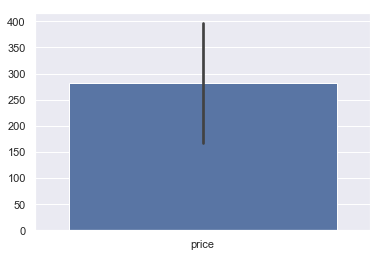

In [44]:
sns.set()
sns.barplot(data=domainData)
plt.show()

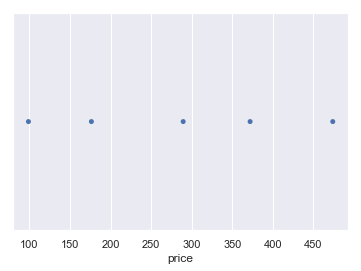

In [49]:
sns.swarmplot(x = "price", data=domainData)
plt.show()

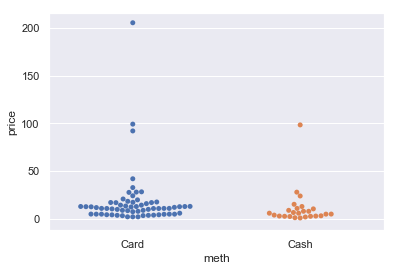

In [16]:
sns.set()
sns.swarmplot(x="meth", y="price", data=data)
plt.show()

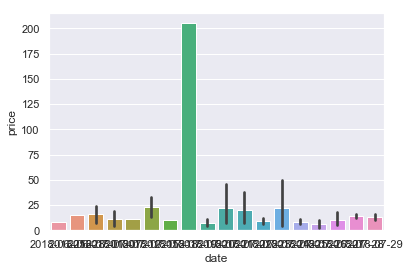

In [17]:
sns.barplot(x="date", y="price", data=data)
plt.show()

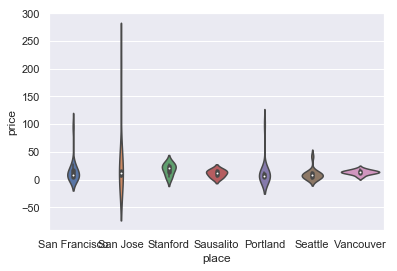

In [18]:
sns.violinplot(x="place", y="price", data=data)
plt.show()